In [2]:
%matplotlib notebook
%matplotlib inline

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
housing_df = pd.read_csv("DC_Properties.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
housing_df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [6]:
housing_df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [9]:
#Filter orginal dataframe to get to meaningful data 54,752 rows
housing_df2 = housing_df.drop(["Unnamed: 0", "BLDG_NUM", "NATIONALGRID", "X", "Y"], axis=1)
housing_df2['YEAR'] = pd.DatetimeIndex(housing_df2['SALEDATE']).year
housing_df2['MONTH'] = pd.DatetimeIndex(housing_df2['SALEDATE']).month
hdf3 = housing_df2.loc[housing_df2['SOURCE'] == 'Residential', : ]
hdf4 = hdf3.dropna(subset=['PRICE'])
hdf5 = hdf4.loc[hdf4['YEAR']> 1991, : ]
hdf6 = hdf5.loc[hdf5['YEAR']< 2018, : ]
hdf6.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,YEAR,MONTH
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2003.0,11.0
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2016.0,6.0
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2006.0,7.0
5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,1972,...,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,2010.0,2.0
7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,1972,...,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,NW,2011.0,9.0


In [25]:
# #Group the dataframe by year
grouped_year = hdf6.groupby("YEAR").PRICE.agg(["min", "mean", "max", "count"])
grouped_year

,min,mean,max,count
YEAR,,,,
1992.0,23625.0,235334.285303,2620000.0,694
1993.0,3000.0,217414.979626,2150000.0,589
1994.0,1000.0,217821.676056,1450000.0,710
1995.0,14500.0,219253.386807,2450000.0,667
1996.0,936.0,217792.614883,1685740.0,766
1997.0,250.0,232816.539666,4115000.0,958
1998.0,10.0,222925.642609,3120000.0,1150
1999.0,250.0,255624.005460,5000000.0,1282
2000.0,1.0,261697.673183,2925000.0,1637


In [71]:
#Filter on ward
ward_1 = hdf6[hdf6.WARD == "Ward 1"]
ward_2 = hdf6[hdf6.WARD == "Ward 2"]
ward_3 = hdf6[hdf6.WARD == "Ward 3"]
ward_4 = hdf6[hdf6.WARD == "Ward 4"]

#Group each ward by year
ward_1_year = ward_1.groupby("YEAR").PRICE.mean()
ward_2_year = ward_2.groupby("YEAR").PRICE.mean()
ward_3_year = ward_3.groupby("YEAR").PRICE.mean()
ward_4_year = ward_4.groupby("YEAR").PRICE.mean()



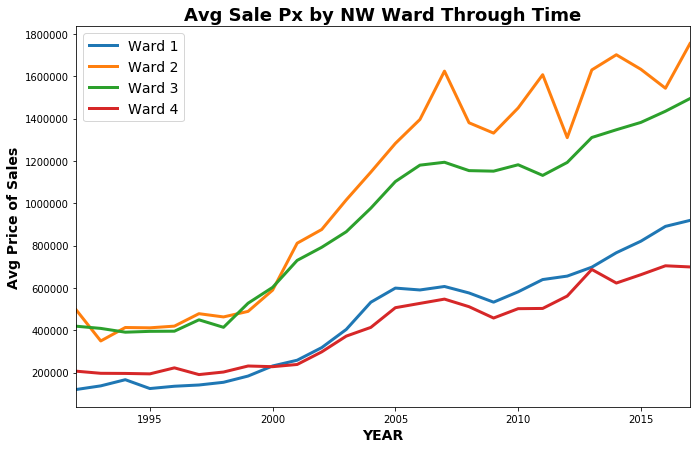

<Figure size 792x504 with 0 Axes>

In [104]:
#Create Line Chart
line_chart = ward_1_year.plot(kind="line", label='Ward 1', figsize=(11,7), linewidth=3)
line_chart = ward_2_year.plot(kind="line", label='Ward 2', figsize=(11,7), linewidth=3)
line_chart = ward_3_year.plot(kind="line", label='Ward 3', figsize=(11,7), linewidth=3)
line_chart = ward_4_year.plot(kind="line", label='Ward 4', figsize=(11,7), linewidth=3)

plt.title("Avg Sale Px by NW Ward Through Time", fontsize=18, fontweight='bold')
line_chart.set_xlabel("YEAR", fontsize=14, fontweight='bold')
line_chart.set_ylabel("Avg Price of Sales", fontsize=14, fontweight='bold')
plt.legend(loc="best", fontsize=14)
plt.show()
plt.savefig("NewImages/Avg Sale Px by NW Ward Through Time.png")

In [73]:
#Create dataframes for each ward in 2017
cond1 = hdf6["WARD"] == "Ward 1"
cond2 = hdf6["WARD"] == "Ward 2"
cond3 = hdf6["WARD"] == "Ward 3"
cond4 = hdf6["WARD"] == "Ward 4"

cond5 = hdf6["YEAR"] == 2017

ward_1_2017 = hdf6[cond1 & cond5]
ward_2_2017 = hdf6[cond2 & cond5]
ward_3_2017 = hdf6[cond3 & cond5]
ward_4_2017 = hdf6[cond4 & cond5]

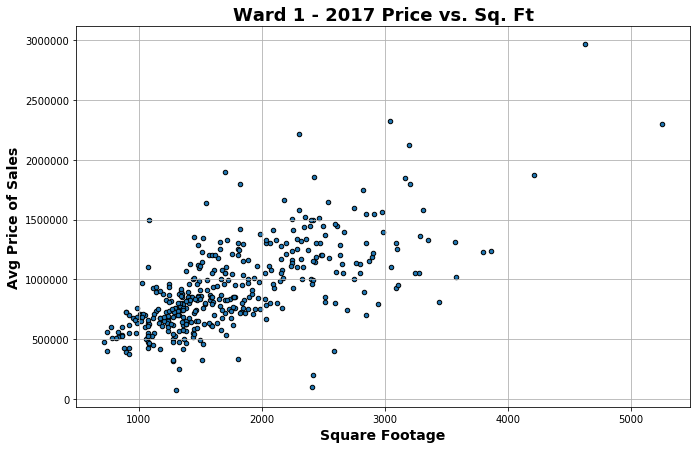

<Figure size 792x504 with 0 Axes>

In [105]:
ward_1_2017.plot(kind="SCATTER", x="GBA", y="PRICE", marker="o", facecolors="blue", edgecolors="black", grid=True, figsize=(11,7))
plt.xlabel("Square Footage", fontsize=14, fontweight='bold')
plt.ylabel("Avg Price of Sales", fontsize=14, fontweight='bold')
plt.title("Ward 1 - 2017 Price vs. Sq. Ft", fontsize=18, fontweight='bold')
plt.show()
plt.savefig("NewImages/Scatter_Ward 1 - 2017 Price vs. Sq. Ft.png")


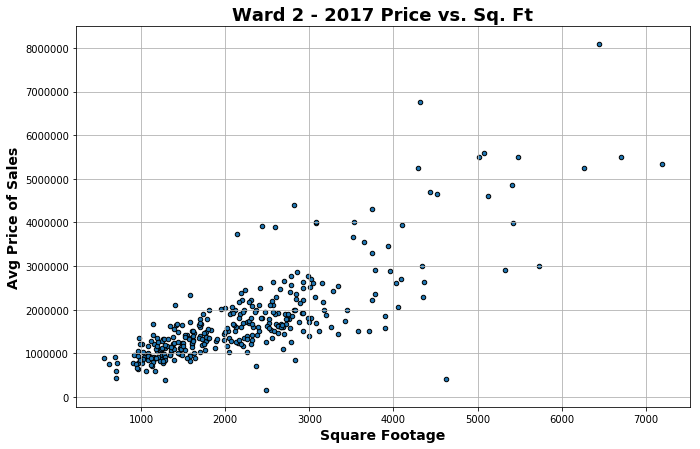

<Figure size 792x504 with 0 Axes>

In [106]:
ward_2_2017.plot(kind="SCATTER", x="GBA", y="PRICE", marker="o", facecolors="blue", edgecolors="black", grid=True, figsize=(11,7))
plt.xlabel("Square Footage", fontsize=14, fontweight='bold')
plt.ylabel("Avg Price of Sales", fontsize=14, fontweight='bold')
plt.title("Ward 2 - 2017 Price vs. Sq. Ft", fontsize=18, fontweight='bold')
plt.show()
plt.savefig("NewImages/Scatter_Ward 2 - 2017 Price vs. Sq. Ft.png")



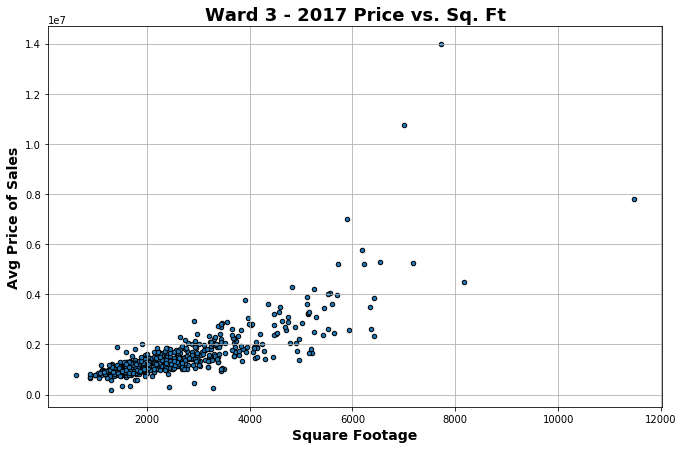

<Figure size 792x504 with 0 Axes>

In [107]:
ward_3_2017.plot(kind="SCATTER", x="GBA", y="PRICE", marker="o", facecolors="blue", edgecolors="black", grid=True, figsize=(11,7))
plt.xlabel("Square Footage", fontsize=14, fontweight='bold')
plt.ylabel("Avg Price of Sales", fontsize=14, fontweight='bold')
plt.title("Ward 3 - 2017 Price vs. Sq. Ft", fontsize=18, fontweight='bold')
plt.show()
plt.savefig("NewImages/Scatter_Ward 3 - 2017 Price vs. Sq. Ft.png")



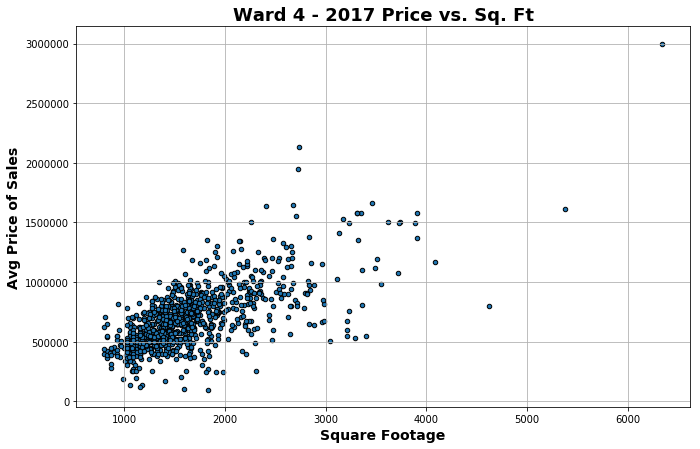

<Figure size 792x504 with 0 Axes>

In [108]:
ward_4_2017.plot(kind="SCATTER", x="GBA", y="PRICE", marker="o", facecolors="blue", edgecolors="black", grid=True, figsize=(11,7))
plt.xlabel("Square Footage", fontsize=14, fontweight='bold')
plt.ylabel("Avg Price of Sales", fontsize=14, fontweight='bold')
plt.title("Ward 4 - 2017 Price vs. Sq. Ft", fontsize=18, fontweight='bold')
plt.show()
plt.savefig("NewImages/Scatter_Ward 4 - 2017 Price vs. Sq. Ft.png")



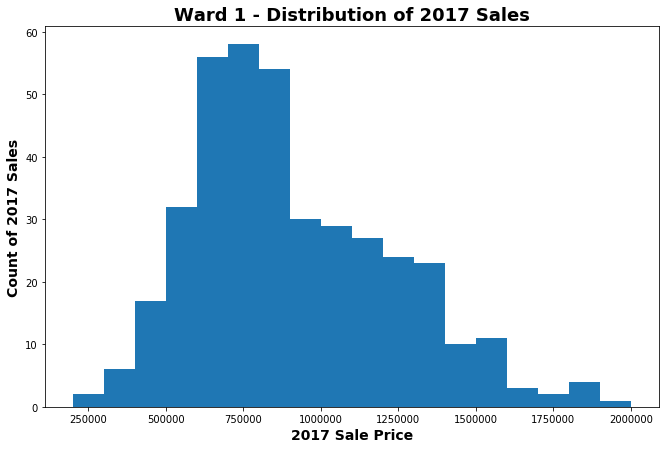

<Figure size 792x504 with 0 Axes>

In [109]:
bin_edges = [200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000]
plt.xlabel("2017 Sale Price", fontsize=14, fontweight='bold')
plt.ylabel("Count of 2017 Sales", fontsize=14, fontweight='bold')
plt.title("Ward 1 - Distribution of 2017 Sales", fontsize=18, fontweight='bold')

plt.hist(ward_1_2017["PRICE"], bins=bin_edges)
plt.figure(figsize=(11,7))
plt.savefig("NewImages/Ward 1 - Distribution of 2017 Sales.png")




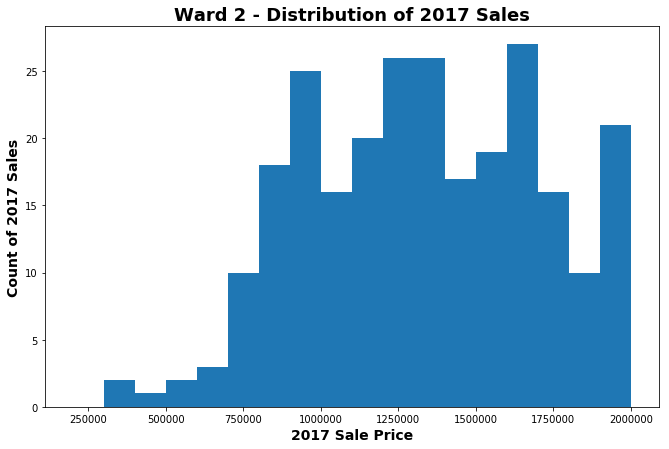

<Figure size 792x504 with 0 Axes>

In [110]:
bin_edges = [200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000]
plt.xlabel("2017 Sale Price", fontsize=14, fontweight='bold')
plt.ylabel("Count of 2017 Sales", fontsize=14, fontweight='bold')
plt.title("Ward 2 - Distribution of 2017 Sales", fontsize=18, fontweight='bold')

plt.hist(ward_2_2017["PRICE"], bins=bin_edges)
plt.figure(figsize=(11,7))
plt.savefig("NewImages/Ward 2 - Distribution of 2017 Sales.png")



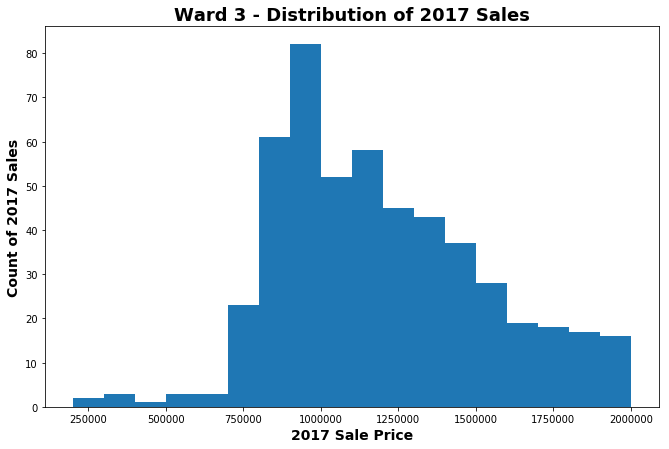

<Figure size 792x504 with 0 Axes>

In [111]:
bin_edges = [200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000]
plt.xlabel("2017 Sale Price", fontsize=14, fontweight='bold')
plt.ylabel("Count of 2017 Sales", fontsize=14, fontweight='bold')
plt.title("Ward 3 - Distribution of 2017 Sales", fontsize=18, fontweight='bold')

plt.hist(ward_3_2017["PRICE"], bins=bin_edges)
plt.figure(figsize=(11,7))
plt.savefig("NewImages/Ward 3 - Distribution of 2017 Sales.png")


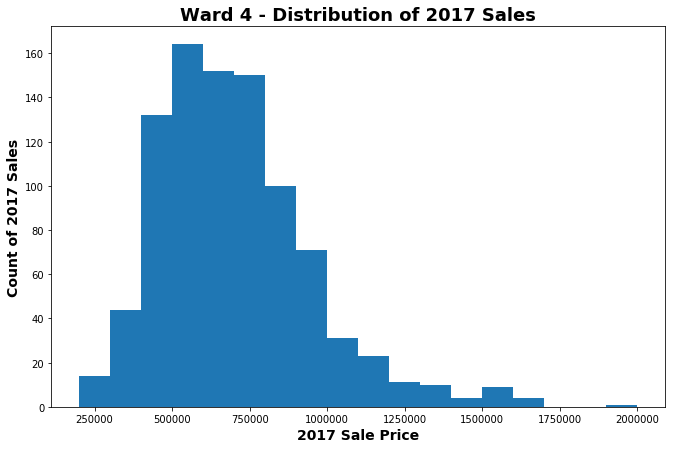

<Figure size 792x504 with 0 Axes>

In [112]:
bin_edges = [200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000]
plt.xlabel("2017 Sale Price", fontsize=14, fontweight='bold')
plt.ylabel("Count of 2017 Sales", fontsize=14, fontweight='bold')
plt.title("Ward 4 - Distribution of 2017 Sales", fontsize=18, fontweight='bold')

plt.hist(ward_4_2017["PRICE"], bins=bin_edges)
plt.figure(figsize=(11,7))
plt.savefig("NewImages/Ward 4 - Distribution of 2017 Sales.png")

